In [2]:
import numpy as np
import pandas as pd

import scikit_posthocs as sp

import seaborn as sns

import matplotlib.pyplot as plt

from src.book_collaborative_filtering.evaluator import Evaluator

In [3]:
number_of_runs = 500
ratings = pd.read_csv("ratings.csv").rename(columns={"book_id": "item_id"})
ratings.head()

,user_id,item_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


# Baseline

In [14]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/book_cf_results_baseline.csv")

# Correlation Function

In [15]:
params = {
    "neighborhood_method": None,
    "correlation_method": "spearman",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": False,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.to_csv("results/book_cf_results_spearman.csv")

498


<AxesSubplot: xlabel='correlation_method', ylabel='mae'>

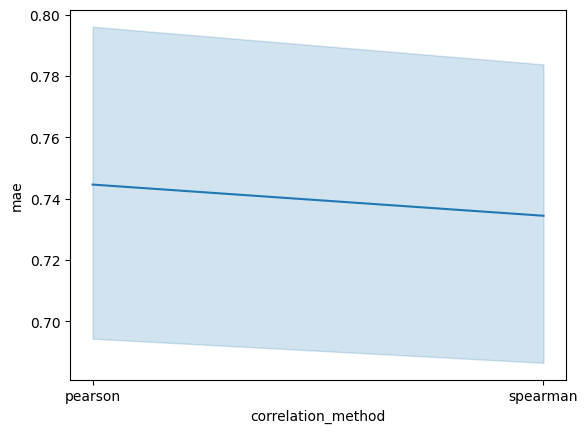

In [16]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_spearman = pd.read_csv("results/book_cf_results_spearman.csv")
print(len(metrics_baseline))
sns.lineplot(data=pd.concat([metrics_baseline, metrics_spearman], axis=0) , x="correlation_method", y="mae")

# Candidates - Minimum Number of Books Rated in Common

In [5]:
for i, minimum_number_of_items_rated_in_common in enumerate(np.linspace(0, 15, 16)):
    params = {
        "neighborhood_method": None,
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": minimum_number_of_items_rated_in_common,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_{i}.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


<AxesSubplot: xlabel='minimum_number_of_items_rated_in_common', ylabel='mae'>

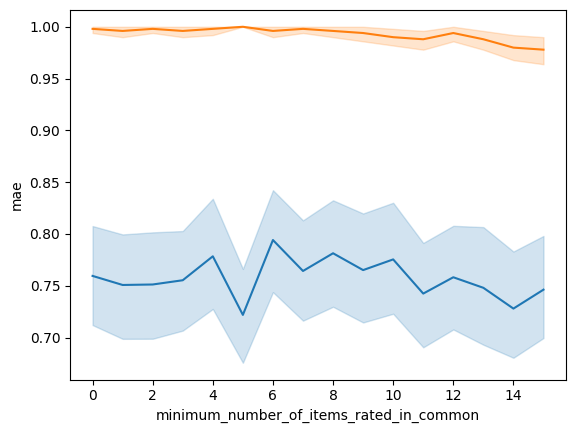

In [7]:
# metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_minimum_number_of_items_rated_in_common = pd.concat([pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_{i}.csv") for i in range(16)], axis=0).reset_index()

# sns.lineplot(data=pd.concat([metrics_baseline, metrics_minimum_number_of_books_rated_in_common], axis=0) , x="minimum_number_of_books_rated_in_common", y="mae")
sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="mae")
sns.lineplot(data=metrics_minimum_number_of_items_rated_in_common , x="minimum_number_of_items_rated_in_common", y="coverage")

# Neighborhood - Minimal Similarity

In [9]:
for i, minimal_similarity in enumerate(np.linspace(0.0, 1.0, 11)):
    print(i)
    params = {
        "neighborhood_method": "threshold",
        "correlation_method": "pearson",
        "minimal_similarity": minimal_similarity,
        "number_of_neighbors": 0,
        "minimum_number_of_items_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/book_cf_results_minimal_similarity_{i}.csv")

0


1
2
3
4
5
6
7
8
9
10


<AxesSubplot: xlabel='minimal_similarity', ylabel='mae'>

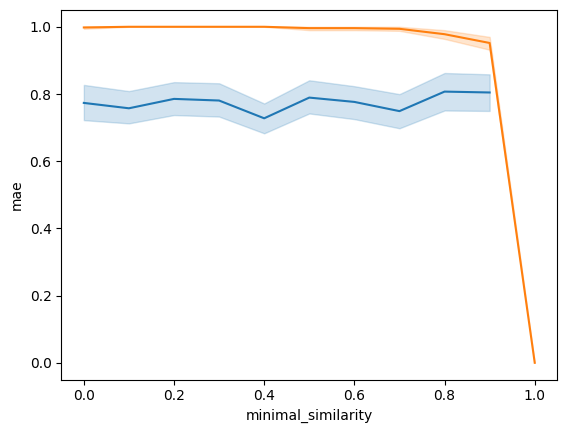

In [10]:
metrics_minimal_similarity = pd.concat([pd.read_csv(f"results/book_cf_results_minimal_similarity_{i}.csv") for i in range(11)], axis=0).reset_index()

sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="mae")
sns.lineplot(data=metrics_minimal_similarity, x="minimal_similarity", y="coverage")

# Neighborhood - Number of Neighbors

In [11]:
for i, number_of_neighbors in enumerate(np.linspace(1000, 15000, 15)):
    print(i)
    params = {
        "neighborhood_method": "number",
        "correlation_method": "pearson",
        "minimal_similarity": -1,
        "number_of_neighbors": int(number_of_neighbors),
        "minimum_number_of_items_rated_in_common": 1,
        "minimal_number_of_ratings": 1,
        "deviation_from_mean": False,
    }

    evaluator = Evaluator(ratings=ratings, params=params)
    evaluator.run_parallel(number_of_runs=number_of_runs)

    metrics = pd.DataFrame(evaluator.metrics)
    metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
    metrics.head()
    metrics.to_csv(f"results/book_cf_results_number_of_neighbors_{i}.csv")

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


<AxesSubplot: xlabel='number_of_neighbors', ylabel='mae'>

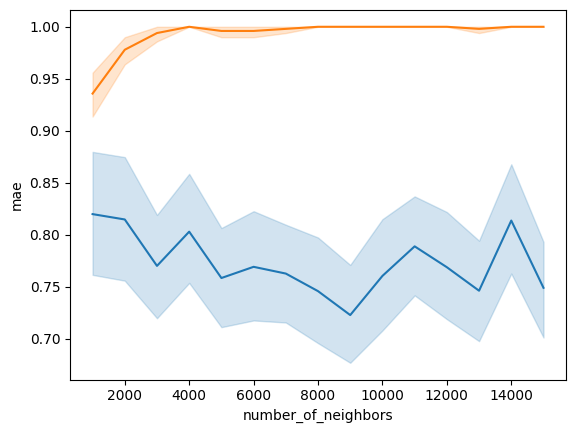

In [12]:
# metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
number_of_neighbors = pd.concat([pd.read_csv(f"results/book_cf_results_number_of_neighbors_{i}.csv") for i in range(15)], axis=0).reset_index()

sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="mae")
sns.lineplot(data=number_of_neighbors, x="number_of_neighbors", y="coverage")

# Mean adjusted

In [13]:
params = {
    "neighborhood_method": None,
    "correlation_method": "pearson",
    "minimal_similarity": -1,
    "number_of_neighbors": 0,
    "minimum_number_of_items_rated_in_common": 1,
    "minimal_number_of_ratings": 1,
    "deviation_from_mean": True,
}

evaluator = Evaluator(ratings=ratings, params=params)
evaluator.run_parallel(number_of_runs=number_of_runs)

metrics = pd.DataFrame(evaluator.metrics)
metrics = metrics.join(pd.DataFrame(params, index=[0]), how='cross')
metrics.head()
metrics.to_csv("results/book_cf_results_mean_adjusted.csv")

<AxesSubplot: xlabel='deviation_from_mean', ylabel='mae'>

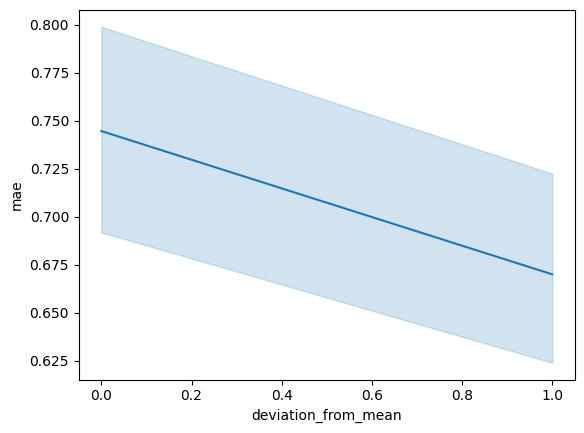

In [14]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_mean_adjusted = pd.read_csv("results/book_cf_results_mean_adjusted.csv")

sns.lineplot(data=pd.concat([metrics_baseline, metrics_mean_adjusted], axis=0) , x="deviation_from_mean", y="mae")

In [45]:
metrics_baseline = pd.read_csv("results/book_cf_results_baseline.csv")
metrics_baseline["cv_fold"] = metrics_baseline.index
metrics_baseline["estimator"] = "baseline"
metrics_mean_adjusted = pd.read_csv("results/book_cf_results_mean_adjusted.csv")
metrics_mean_adjusted["cv_fold"] = metrics_mean_adjusted.index
metrics_mean_adjusted["estimator"] = "mean_adjusted"
metrics_spearman = pd.read_csv("results/book_cf_results_spearman.csv")
metrics_spearman["cv_fold"] = metrics_spearman.index
metrics_spearman["estimator"] = "spearman"
minimum_number_of_items_rated_in_common = \
    pd.read_csv(f"results/book_cf_results_minimum_number_of_items_rated_in_common_5.csv")
minimum_number_of_items_rated_in_common["cv_fold"] = minimum_number_of_items_rated_in_common.index
minimum_number_of_items_rated_in_common["estimator"] = "minimum_5_items_rated_in_common"
metrics_minimal_similarity = pd.read_csv(f"results/book_cf_results_minimal_similarity_4.csv")
metrics_minimal_similarity["cv_fold"] = metrics_minimal_similarity.index
metrics_minimal_similarity["estimator"] = "minimal_similarity_0.4"
number_of_neighbors = pd.read_csv(f"results/book_cf_results_number_of_neighbors_8.csv")
number_of_neighbors["cv_fold"] = number_of_neighbors.index
number_of_neighbors["estimator"] = "minimum_9k_number_of_neighbors"

data=pd.concat([metrics_baseline, metrics_mean_adjusted, metrics_spearman, minimum_number_of_items_rated_in_common, metrics_minimal_similarity, number_of_neighbors], axis=0)
data["score"] = -data["mae"]
data.head()

,Unnamed: 0,coverage,mae,neighborhood_method,correlation_method,minimal_similarity,number_of_neighbors,minimum_number_of_items_rated_in_common,minimal_number_of_ratings,deviation_from_mean,cv_fold,estimator,score
0,0,1.0,0.364637,NaN,pearson,-1.0,0,1.0,1,False,0,baseline,-0.364637
1,1,1.0,0.688051,NaN,pearson,-1.0,0,1.0,1,False,1,baseline,-0.688051
2,2,1.0,1.039577,NaN,pearson,-1.0,0,1.0,1,False,2,baseline,-1.039577
3,3,1.0,0.906946,NaN,pearson,-1.0,0,1.0,1,False,3,baseline,-0.906946
4,4,1.0,0.128336,NaN,pearson,-1.0,0,1.0,1,False,4,baseline,-0.128336


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2a26f5ac0>)

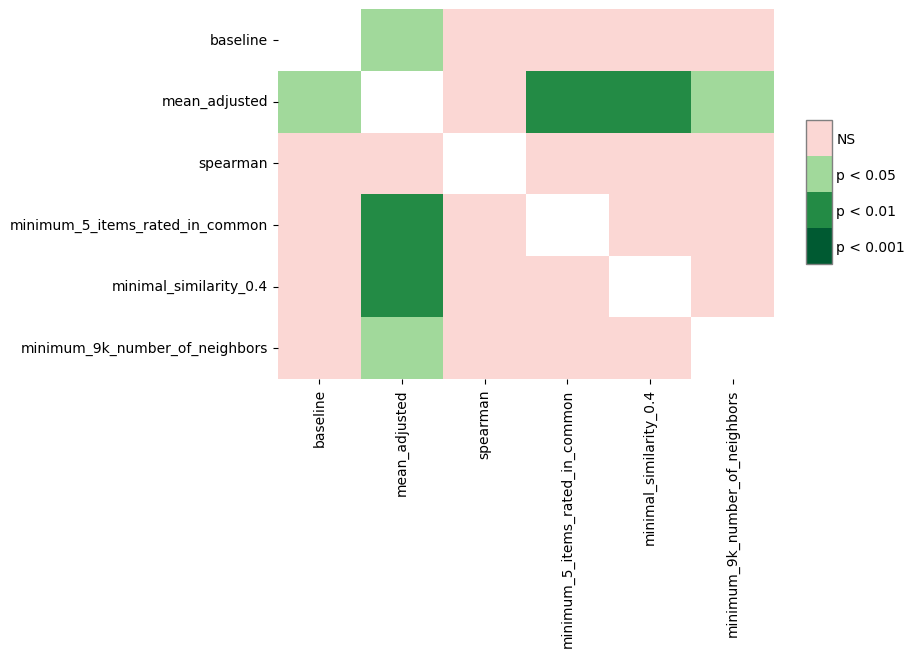

In [46]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='cv_fold',
    group_col='estimator',
    y_col='score',
)
sp.sign_plot(test_results)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


{'markers': [<matplotlib.collections.PathCollection at 0x2a26d9190>,
 'elbows': [<matplotlib.lines.Line2D at 0x2a2775b80>,
 'labels': [Text(0.5539223560910307, -3, 'minimal_similarity_0.4 (0.56)'),
  Text(0.5539223560910307, -4, 'minimum_5_items_rated_in_common (0.57)'),
  Text(0.5539223560910307, -5, 'baseline (0.57)'),
  Text(0.6334939759036144, -3, '(0.62) mean_adjusted'),
  Text(0.6334939759036144, -4, '(0.59) spearman'),
  Text(0.6334939759036144, -5, '(0.58) minimum_9k_number_of_neighbors')],
 'crossbars': [[<matplotlib.lines.Line2D at 0x2a2747500>],
  [<matplotlib.lines.Line2D at 0x2a2775850>]]}

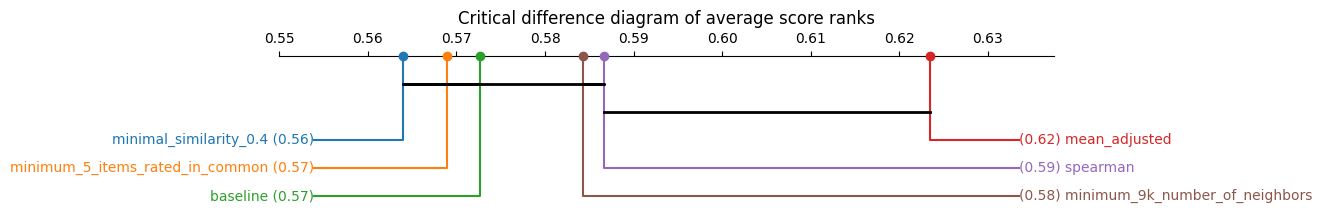

In [47]:
avg_rank = data.groupby('cv_fold').score.rank(pct=True).groupby(data.estimator).mean()

plt.figure(figsize=(10, 2), dpi=100)
plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)